# Practicioners Seminar

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

## Task 2

### A correlation heatmap for currencies and equity markets
Prepare data

In [138]:
# Read df
currencies = "Data/FX_CHF_ALL_1971-2020.xlsx"
msci_all_local = "Data/MSCI_ALL_LOCAL.xlsx"
interest_rates = "Data/3M_interest_rates.xlsx"
df_fx_indirect = pd.read_excel(currencies, header=0, index_col=0, sheet_name="Sheet1")
df_msci_local = pd.read_excel(msci_all_local, header=3, index_col=0, sheet_name="CleanTimeSeries")

# Direct FX rates
df_fx_direct = 1 / df_fx_indirect
df_fx_direct = df_fx_direct.replace([np.inf, -np.inf], np.nan)
df_fx_direct.columns = ['USDCHF', 'EURCHF', 'GBPCHF', 'AUDCHF', 'JPYCHF', 'CADCHF']


# Interest rates
df_r = pd.read_excel(interest_rates, header=1, index_col=0)
df_r.columns = ['CHF', 'USD', 'EUR', 'GBP', 'JPY', 'CAD', 'AUD']
df_r = df_r/100
df_r = df_r[df_r!=0].dropna()


In [133]:
# Function to get forward rates
def fx_forward(currency_pair, t, t_1):
    """Useage:
    date_1 = pd.Timestamp('2020-12-16')
    date_2 = pd.Timestamp('2020-12-18')
    fx_forward('USDCHF', date_1, date_2)
    """
    # Get spot exchange rate and LIBOR rates
    s = df_fx_direct.loc[t, currency_pair]
    r_d = df_r.loc[t, currency_pair[3:]]
    r_f = df_r.loc[t, currency_pair[:3]]
    
    # Calculate number of days
    n_days = t_1 - t
    n_days = n_days.days
    
    # Forward rate
    f = s * (1+r_d*n_days/365) / (1+r_f*n_days/365)
    
    return f
    

In [142]:
# Create a df with one period forward rates
df_f = pd.DataFrame(index=df_r.index, columns=df_fx_direct.columns)
df_f = df_f.sort_index()
for d in range(len(df_f.index)-1):
    for c in range(len(df_f.columns)):
        df_f.iloc[d, c] = fx_forward(df_f.columns[c], df_f.index[d], df_f.index[d+1])
df_f

0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1


0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1


5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0


0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1


1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2


0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1


1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2


1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2


,USDCHF,EURCHF,GBPCHF,AUDCHF,JPYCHF,CADCHF
Date,,,,,,
1996-10-01,1.255511,NaN,1.963630,0.993302,0.011268,0.906722
1996-10-02,1.257722,NaN,1.969043,0.993399,0.011243,0.904021
1996-10-03,1.254409,NaN,1.963630,0.992906,0.011259,0.896484
1996-10-04,1.255413,NaN,1.964843,0.993561,0.011230,0.907800
1996-10-08,1.254726,NaN,1.960933,0.991922,0.011235,0.921267
...,...,...,...,...,...,...
2020-12-14,0.886972,1.077115,1.182006,0.668256,0.008523,0.694903
2020-12-15,0.885636,1.076420,1.192579,0.669464,0.008543,0.697326
2020-12-16,0.885088,1.079791,1.196145,0.670631,0.008558,0.694710


In [ ]:
# The MSCI LOCAL are now in their local currency. To get their value from a CHF investor perspective, we need to change the values to CHF
df_msci_local_chf = df_msci_local.copy()

# MSCI World and US are denoted in USD
df_msci_local_chf['MSDLWI Index'] = df_msci_local_chf['MSDLWI Index'] * df_fx_direct['USDCHF']
df_msci_local_chf['MXUS Index'] = df_msci_local_chf['MXUS Index'] * df_fx_direct['USDCHF']

# MSCI Europe is denoted in EUR
df_msci_local_chf['MSDLE15 Index'] = df_msci_local_chf['MSDLE15 Index'] * df_fx_direct['EURCHF']

# MSCI Australia is denoted in AUD
df_msci_local_chf['MSDLAS Index'] = df_msci_local_chf['MSDLAS Index'] * df_fx_direct['AUDCHF']

# MSCI Canada is denoted in CAD
df_msci_local_chf['MSDLCA Index'] = df_msci_local_chf['MSDLCA Index'] * df_fx_direct['CADCHF']

# MSCI Japan is denoted in JPY
df_msci_local_chf['MSDLJN Index'] = df_msci_local_chf['MSDLJN Index'] * df_fx_direct['JPYCHF']

# MSCI UK is denoted in GBP
df_msci_local_chf['MSDLUK Index'] = df_msci_local_chf['MSDLUK Index'] * df_fx_direct['EURCHF']

# Drop columns with NA
df_msci_local_chf = df_msci_local_chf[df_msci_local_chf!=0].dropna()

# Combine the df
df_msci_fx = pd.concat([df_msci_local_chf, df_fx_direct], axis=1, join="inner")

# Create df with returns
df_msci_fx_ret = np.log(df_msci_fx.sort_index()).diff()
df_msci_fx_ret = df_msci_fx_ret[df_msci_fx_ret!=0].dropna()

Correlation heatmap

<AxesSubplot:>

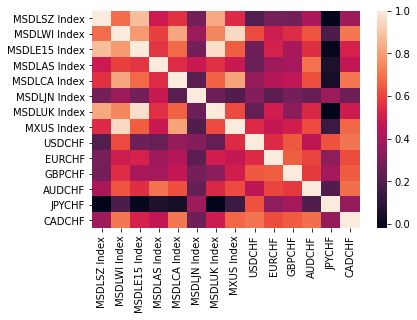

In [72]:
sns.heatmap(df_msci_fx_ret.corr(), xticklabels=df_msci_fx_ret.columns.values, yticklabels=df_msci_fx_ret.columns.values)

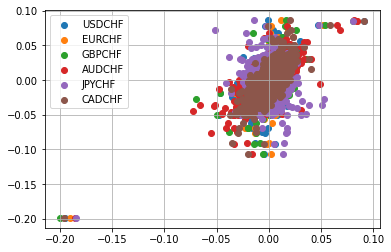

In [73]:
fig, ax = plt.subplots()
for currency in df_fx_direct.columns:
    ax.scatter(df_msci_fx_ret[currency], df_msci_fx_ret['MSDLWI Index'], label=currency)
ax.legend()
ax.grid(True)

<AxesSubplot:>

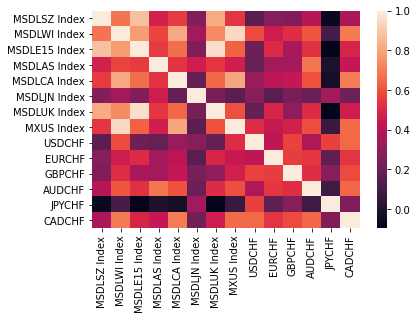

In [74]:
# Test if correlations are more clear if we remove the 15th January 2015, the day the pegging of the CHF was removed
df_msci_fx_ret_no_15January2015 = df_msci_fx_ret[df_msci_fx_ret['MSDLWI Index'] != df_msci_fx_ret['MSDLWI Index'].min()]
sns.heatmap(df_msci_fx_ret_no_15January2015.corr(), xticklabels=df_msci_fx_ret_no_15January2015.columns.values, yticklabels=df_msci_fx_ret_no_15January2015.columns.values)

Correlation MSCI World and FX rates

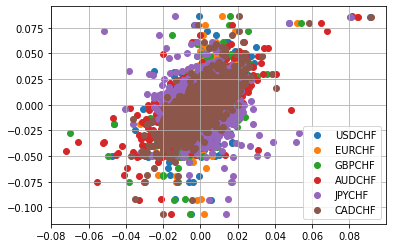

In [75]:
fig, ax = plt.subplots()
for currency in df_fx_direct.columns:
    ax.scatter(df_msci_fx_ret_no_15January2015[currency], df_msci_fx_ret_no_15January2015['MSDLWI Index'], label=currency)
ax.legend()
ax.grid(True)

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


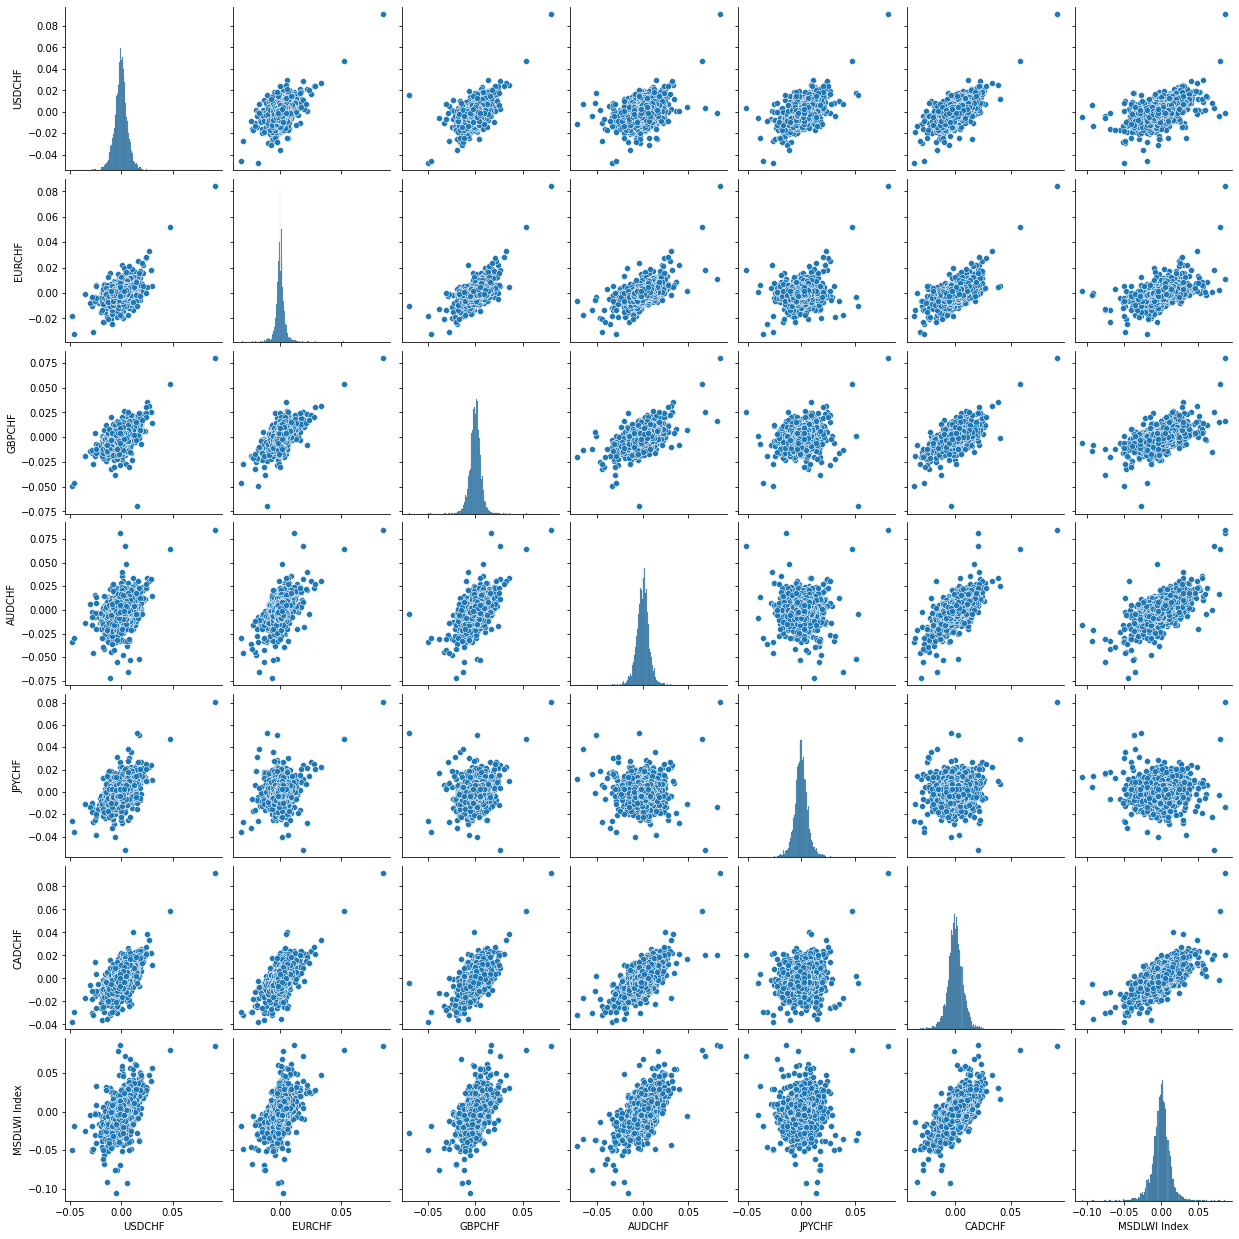

In [76]:
df_plot = df_msci_fx_ret_no_15January2015[df_fx_direct.columns]
df_plot.loc[:,'MSDLWI Index'] = df_msci_fx_ret_no_15January2015['MSDLWI Index']

sns.pairplot(df_plot)

In [77]:
df_plot.corr()

,USDCHF,EURCHF,GBPCHF,AUDCHF,JPYCHF,CADCHF,MSDLWI Index
USDCHF,1.000000,0.418568,0.570831,0.379866,0.565846,0.653694,0.587841
EURCHF,0.418568,1.000000,0.557247,0.540648,0.174700,0.534873,0.458400
GBPCHF,0.570831,0.557247,1.000000,0.517976,0.278031,0.588934,0.514731
AUDCHF,0.379866,0.540648,0.517976,1.000000,0.086707,0.651051,0.612371
JPYCHF,0.565846,0.174700,0.278031,0.086707,1.000000,0.260001,0.111526
CADCHF,0.653694,0.534873,0.588934,0.651051,0.260001,1.000000,0.692917
MSDLWI Index,0.587841,0.458400,0.514731,0.612371,0.111526,0.692917,1.000000


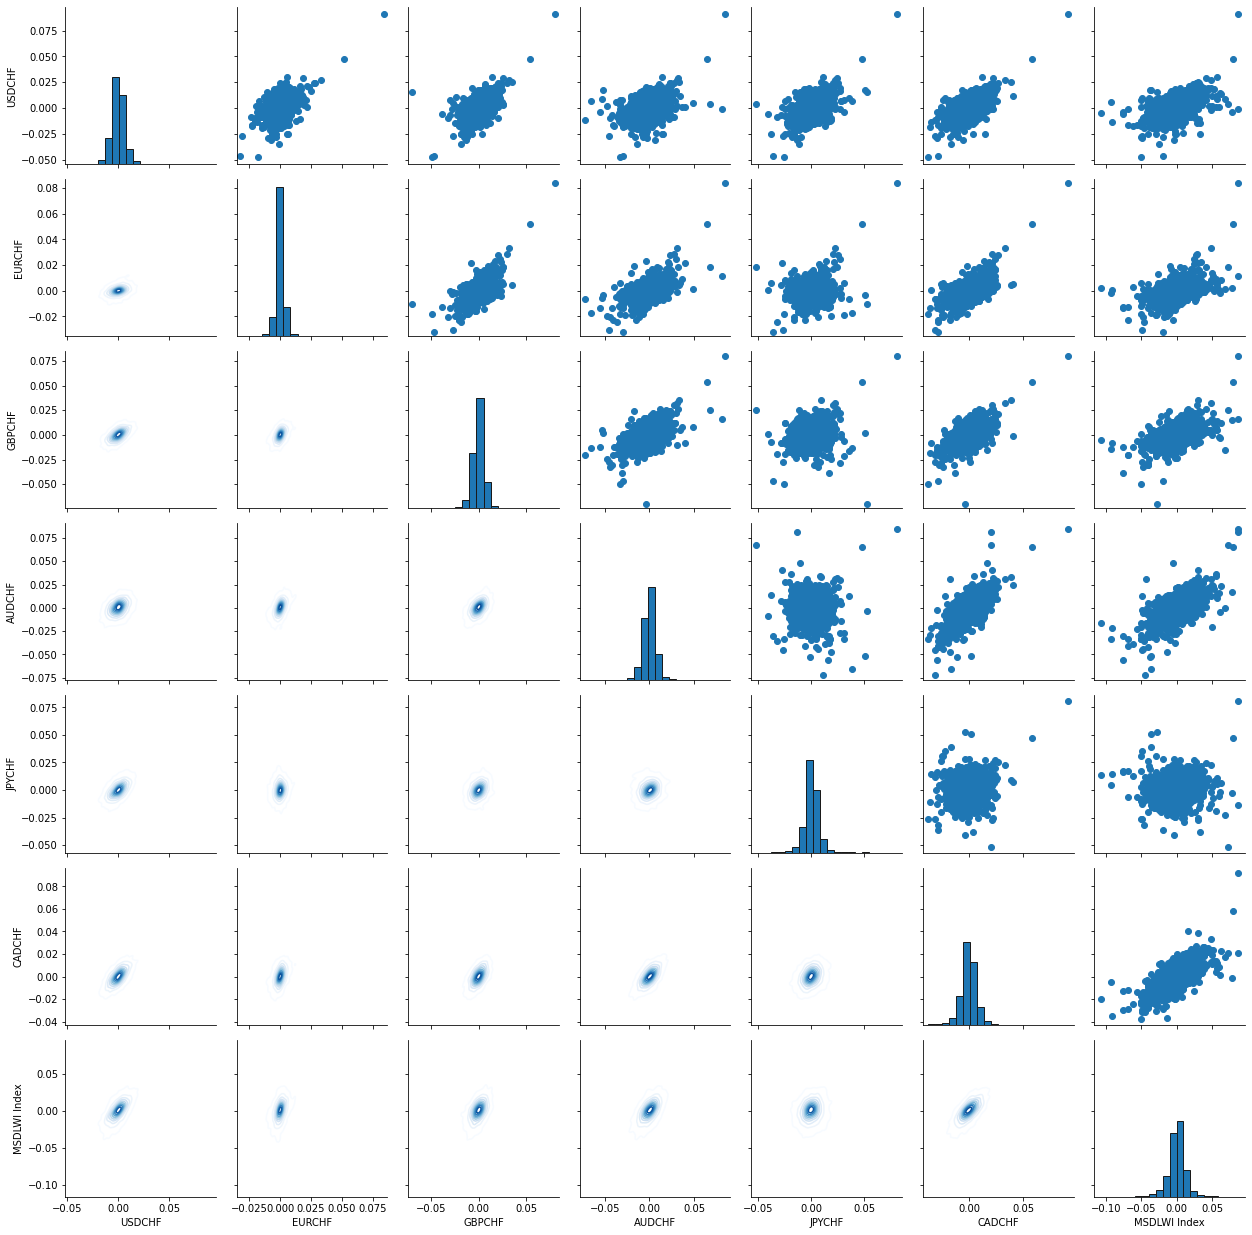

In [78]:
# Gridplot
grid = sns.PairGrid(data=df_plot)
grid = grid.map_upper(plt.scatter)
grid = grid.map_diag(plt.hist, bins = 20, 
                     edgecolor = 'k')
grid = grid.map_lower(sns.kdeplot, cmap = 'Blues')


### Same with monthly data

In [79]:
# Read df
currencies = "Data/FX_CHF_ALL_1971-2020.xlsx"
msci_all_local = "Data/MSCI_ALL_LOCAL_MONTHLY.xlsx"
df_fx_indirect = pd.read_excel(currencies, header=0, index_col=0, sheet_name="Sheet1")
df_msci_local = pd.read_excel(msci_all_local, header=0, index_col=0)

# Direct FX rates
df_fx_direct = 1 / df_fx_indirect
df_fx_direct = df_fx_direct.replace([np.inf, -np.inf], np.nan)
df_fx_direct.columns = ['USDCHF', 'EURCHF', 'GBPCHF', 'AUDCHF', 'JPYCHF', 'CADCHF']


# The MSCI LOCAL are now in their local currency. To get their value from a CHF investor perspective, we need to change the values to CHF
df_msci_local_chf = df_msci_local.copy()

# MSCI World and US are denoted in USD
df_msci_local_chf['MSDLWI Index'] = df_msci_local_chf['MSDLWI Index'] * df_fx_direct['USDCHF']
df_msci_local_chf['MXUS Index'] = df_msci_local_chf['MXUS Index'] * df_fx_direct['USDCHF']

# MSCI Europe is denoted in EUR
df_msci_local_chf['MSDLE15 Index'] = df_msci_local_chf['MSDLE15 Index'] * df_fx_direct['EURCHF']

# MSCI Australia is denoted in AUD
df_msci_local_chf['MSDLAS Index'] = df_msci_local_chf['MSDLAS Index'] * df_fx_direct['AUDCHF']

# MSCI Canada is denoted in CAD
df_msci_local_chf['MSDLCA Index'] = df_msci_local_chf['MSDLCA Index'] * df_fx_direct['CADCHF']

# MSCI Japan is denoted in JPY
df_msci_local_chf['MSDLJN Index'] = df_msci_local_chf['MSDLJN Index'] * df_fx_direct['JPYCHF']

# MSCI UK is denoted in GBP
df_msci_local_chf['MSDLUK Index'] = df_msci_local_chf['MSDLUK Index'] * df_fx_direct['EURCHF']

# Drop columns with NA
df_msci_local_chf = df_msci_local_chf[df_msci_local_chf!=0].dropna()

# Combine the df
df_msci_fx = pd.concat([df_msci_local_chf, df_fx_direct], axis=1, join="inner")

# Create df with returns
df_msci_fx_ret = np.log(df_msci_fx.sort_index()).diff()
df_msci_fx_ret = df_msci_fx_ret[df_msci_fx_ret!=0].dropna()

<AxesSubplot:>

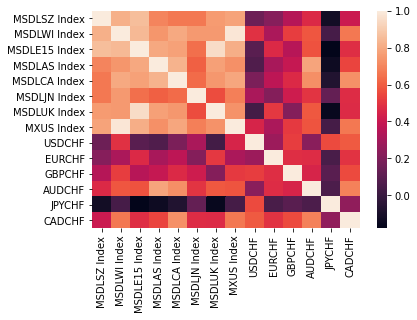

In [80]:
sns.heatmap(df_msci_fx_ret.corr(), xticklabels=df_msci_fx_ret.columns.values, yticklabels=df_msci_fx_ret.columns.values)

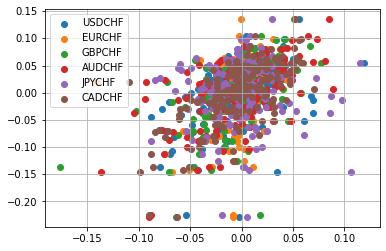

In [81]:
fig, ax = plt.subplots()
for currency in df_fx_direct.columns:
    ax.scatter(df_msci_fx_ret[currency], df_msci_fx_ret['MSDLWI Index'], label=currency)
ax.legend()
ax.grid(True)

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


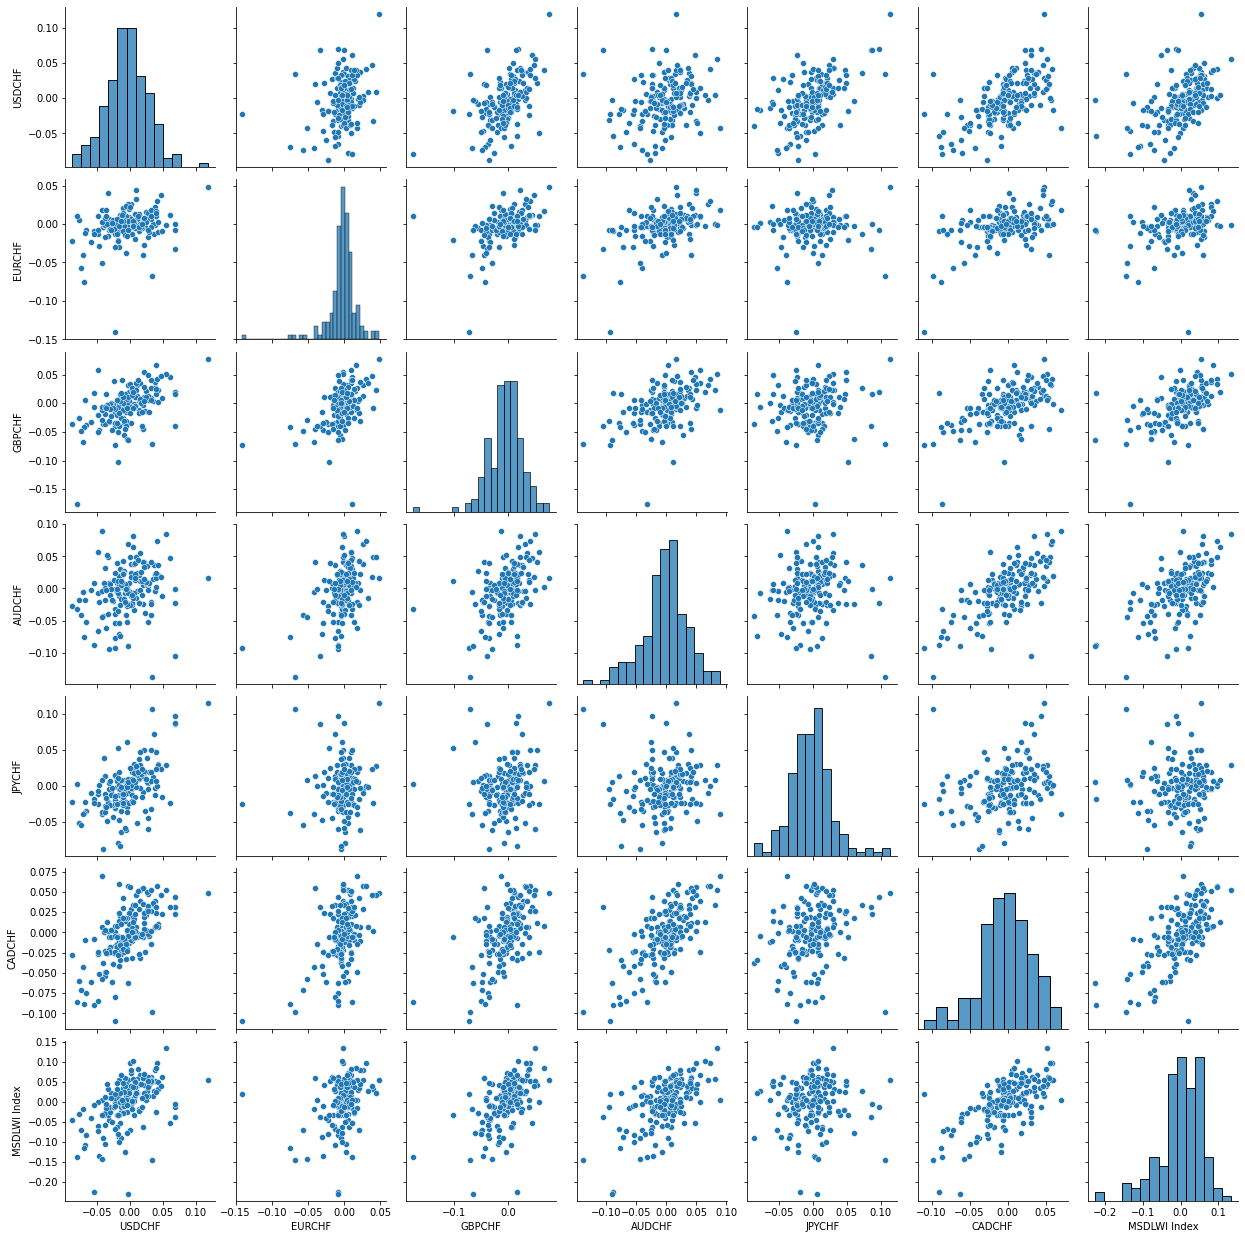

In [82]:
df_plot = df_msci_fx_ret[df_fx_direct.columns]
df_plot.loc[:,'MSDLWI Index'] = df_msci_fx_ret['MSDLWI Index']

sns.pairplot(df_plot)

In [83]:
df_plot.corr()

,USDCHF,EURCHF,GBPCHF,AUDCHF,JPYCHF,CADCHF,MSDLWI Index
USDCHF,1.000000,0.281381,0.523237,0.229473,0.557867,0.595493,0.490256
EURCHF,0.281381,1.000000,0.482790,0.477565,0.052770,0.496247,0.320339
GBPCHF,0.523237,0.482790,1.000000,0.452841,0.098354,0.558697,0.525691
AUDCHF,0.229473,0.477565,0.452841,1.000000,0.062097,0.687782,0.582934
JPYCHF,0.557867,0.052770,0.098354,0.062097,1.000000,0.247113,0.041803
CADCHF,0.595493,0.496247,0.558697,0.687782,0.247113,1.000000,0.664735
MSDLWI Index,0.490256,0.320339,0.525691,0.582934,0.041803,0.664735,1.000000


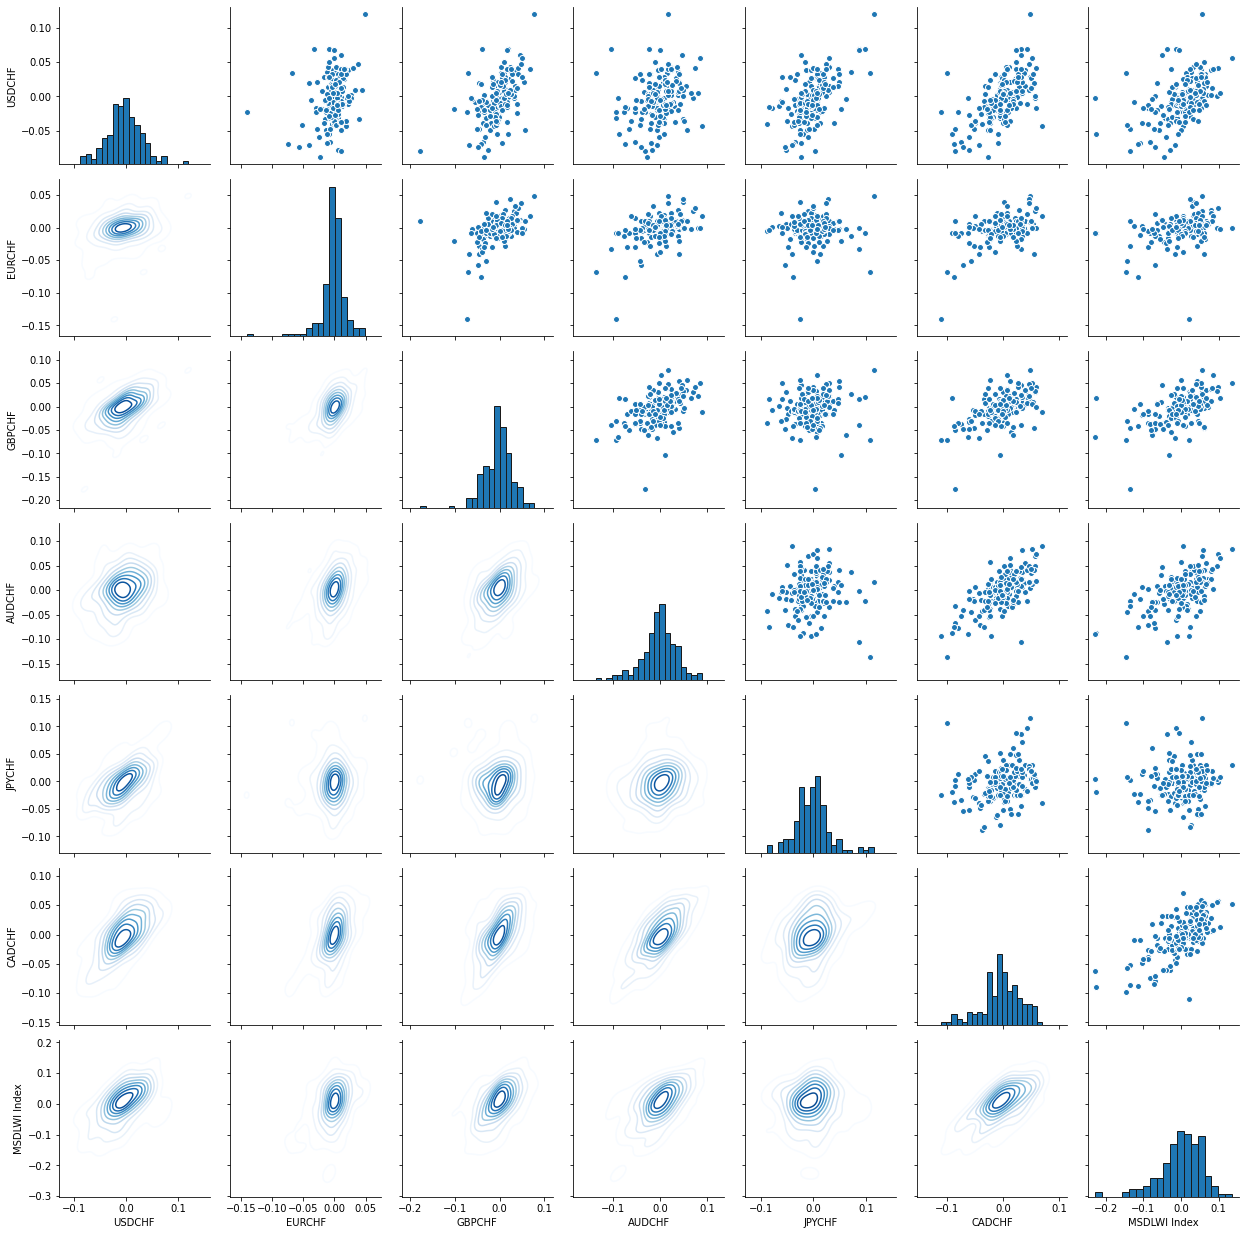

In [84]:
# sns.set(rc={'figure.facecolor':'black', 'axes.facecolor':'white'})
# Gridplot
grid = sns.PairGrid(data=df_plot)
grid = grid.map_upper(plt.scatter, edgecolor = 'white')
grid = grid.map_diag(plt.hist, bins = 20, 
                     edgecolor = 'k')
grid = grid.map_lower(sns.kdeplot, cmap = 'Blues')


In [69]:
grid.savefig('Plots/FX_MSCIWorld_PairCorrelation_Monthly.jpg')


# Code from below is old

In [ ]:
df_msci_local_chf


In [ ]:
currencies = "Data/FX_CHF_ALL_1971-2020.xlsx"
msci_all_local = "Data/MSCI_ALL_LOCAL.xlsx"
msci_all_usd_chf = "Data/MSCI_ALL_USD_CHF.xlsx"
df_currencies = pd.read_excel(currencies, header=0, index_col=0, sheet_name="Sheet1")
df_msci_all_local = pd.read_excel(msci_all_local, header=3, index_col=0, sheet_name="CleanTimeSeries")
df_msci_all_usd_chf = pd.read_excel(msci_all_usd_chf, header=3, index_col=0, sheet_name="CleanTimeSeries")

combined_df = pd.concat([df_currencies, df_msci_all_local], axis=1, join="inner")
combined_df_usd_chf = pd.concat([df_currencies, df_msci_all_usd_chf], axis=1, join="inner")

In [ ]:
combined_df

In [ ]:
return_cor = combined_df.corr()
sns.heatmap(return_cor, xticklabels=return_cor.columns.values, yticklabels=return_cor.columns.values)

In [ ]:
#combined_df.corr()

In [ ]:
z=combined_df
z = z[z!=0].dropna()
sns.heatmap(z.corr(), xticklabels=z.columns.values, yticklabels=z.columns.values)

In [ ]:
# Return df
return_df = np.log(combined_df.sort_index()).diff()
return_df = return_df[return_df!=0].dropna()
return_df

#### Heatmap local

In [ ]:
sns.heatmap(return_df.corr(), xticklabels=z.columns.values, yticklabels=z.columns.values)

Problem that MXUS is calculated with the USD method and not local as the others? Even though USD is the local currency of MXUS? 
Solved, found MXUS LOCAL on Refinitiv (only from 2001 onwards though)

#### Heatmap USD

In [ ]:
return_df_usd_chf = np.log(combined_df_usd_chf.sort_index()).diff()
return_df_usd_chf = return_df_usd_chf[return_df_usd_chf!=0].dropna()
sns.heatmap(return_df_usd_chf.corr(), xticklabels=z.columns.values, yticklabels=z.columns.values)

### Determine Hedge Ratios
#### Through regression
Need to find out which variables to take exactly for the regression, and what our hedge ratio then is!

In [ ]:
return_df_usd_chf

In [ ]:
# Define X and Y of regression (in case they are from different data frames)

# First remove spaces from column names
x_columns = return_df_usd_chf.columns
x_columns = [x.replace(' ', '') for x in x_columns]
return_df_usd_chf.columns = x_columns

y = return_df_usd_chf['MXWOIndex']
x_columns = return_df_usd_chf.columns
x_columns = x_columns.drop('MXWOIndex')
x = return_df_usd_chf[x_columns]

# Create common df
reg_df = pd.concat([y, x], axis=1, join="inner")

In [ ]:
# Multivariate regression
formula = "MXWOIndex ~ CHFUSD + CHFEUR + CHFGBP + CHFAUD + CHFJPY + CHFCAD + MSDUSZIndex + MSDUE15Index + MSDUASIndex + MSDUCAIndex + MSDUJNIndex + MSDUUKIndex + MXUSIndex"
factor_model = ols(formula, data = reg_df)
factor_model = factor_model.fit()
factor_model.summary()

#### Portfolio optimization approach
Probably need to change to black litterman approach with market implied expected returns. For currency pairs the market implied expected returns should be given by interest rate differentials. Also how is the hedge done? Probably not by keeping part of portfolio in foreign currency cash! If its done through forwards, we need to take some margin assumptions!

In [ ]:
# Portfolio components
portfolio_chf_components = return_df_usd_chf[['MXWOIndex', 'CHFUSD', 'CHFEUR', 'CHFGBP', 'CHFAUD', 'CHFJPY', 'CHFCAD']]

# Prepare covariance matrix and expected return vector
risk_free_rate = pd.read_excel('Data/3M_interest_rates.xlsx', index_col=0, header=1)
risk_free_rate_chf = risk_free_rate['SF0003M  Index']

# For MSCI World denominated in CHF subtract 3 CHF risk free interest rate to get excess returns?
portfolio_chf_excess_returns = portfolio_chf_components

# Change annualized risk free rate to a continuous daily rate in %
risk_free_rate_chf = pow(risk_free_rate_chf/100 + 1, 1/252) - 1

# Subtract the daily risk free rate from MSCI World returns
portfolio_chf_excess_returns.loc[: ,'MXWOIndex'] = portfolio_chf_excess_returns['MXWOIndex'] - risk_free_rate_chf[risk_free_rate_chf.index.isin(portfolio_chf_excess_returns.index)]
portfolio_chf_excess_returns = portfolio_chf_excess_returns[portfolio_chf_excess_returns!=0].dropna()

portfolio_covar = portfolio_chf_excess_returns.cov()
portfolio_expected_return = portfolio_chf_excess_returns.mean()

# Note that MSCI World performance was actually quiet bad for CHF investor since 2000 (see plot)
combined_df_usd_chf['MXWO Index'].plot()
combined_df['MSDLWI Index'].plot()



In [ ]:
# Calculate optimal weights
numerator = np.dot(np.linalg.inv(portfolio_covar), portfolio_expected_return) 
denumerator = np.dot(np.dot(np.ones(len(portfolio_expected_return)), np.linalg.inv(portfolio_covar)), portfolio_expected_return)

optimal_weights = pd.Series(numerator / denumerator, index = portfolio_expected_return.index)
optimal_weights